# **Exploratory Data Analysis (EDA)**

In [101]:
# import necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [102]:
# Load the Dataset.

sales_df = pd.read_csv('/content/Cleaned_Sales_Customer_Behavior_Dataset.csv')

sales_df

,customer_id,name,age,gender,location,product_category,purchase_amount,purchase_date,loyalty_points,website_visits,preferred_payment_method
0,CUST1000,Customer_0,64,Male,North,Toys,301.40,2024-12-01,271,39,Debit Card
1,CUST1001,Customer_1,37,Male,East,Electronics,150.69,2024-12-24,503,10,Net Banking
2,CUST1002,Customer_2,27,Male,East,Fashion,449.15,2024-09-13,482,42,UPI
3,CUST1003,Customer_3,36,Male,East,Beauty,356.97,2024-01-02,412,49,Cash
4,CUST1004,Customer_4,59,Female,East,Toys,257.52,2024-08-30,136,40,Debit Card
...,...,...,...,...,...,...,...,...,...,...,...
4995,CUST5995,Customer_4995,66,Female,South,Beauty,238.14,2024-09-12,357,13,Credit Card
4996,CUST5996,Customer_4996,44,Female,South,Toys,311.76,2024-05-03,229,4,Debit Card
4997,CUST5997,Customer_4997,42,Female,North,Beauty,59.09,2024-07-20,262,46,Cash
4998,CUST5998,Customer_4998,68,Male,East,Fashion,354.23,2024-07-12,782,2,Debit Card


In [103]:
sales_df.columns

Index(['customer_id', 'name', 'age', 'gender', 'location', 'product_category',
       'purchase_amount', 'purchase_date', 'loyalty_points', 'website_visits',
       'preferred_payment_method'],
      dtype='object')

In [104]:
# Convert purchase_date to datetime for time-based analysis

sales_df['purchase_date'] = pd.to_datetime(sales_df['purchase_date'])

In [105]:
# Extract year and month for identifying peak sales periods

sales_df['year'] = sales_df['purchase_date'].dt.year

sales_df['month'] = sales_df['purchase_date'].dt.month

sales_df['dayofweek'] = sales_df['purchase_date'].dt.dayofweek

**Peak Sales Periods (monthly sales)**

In [106]:
# Data by month and sum sales.
monthly_sales = sales_df.groupby(['year', 'month'])['purchase_amount'].sum()

monthly_sales

year  month
2024  1        107648.84
      2         87474.56
      3        102206.74
      4        113105.37
      5        101748.58
      6        109078.31
      7        125563.23
      8        103707.93
      9        101254.18
      10       103385.02
      11       102399.09
      12       106573.91
Name: purchase_amount, dtype: float64

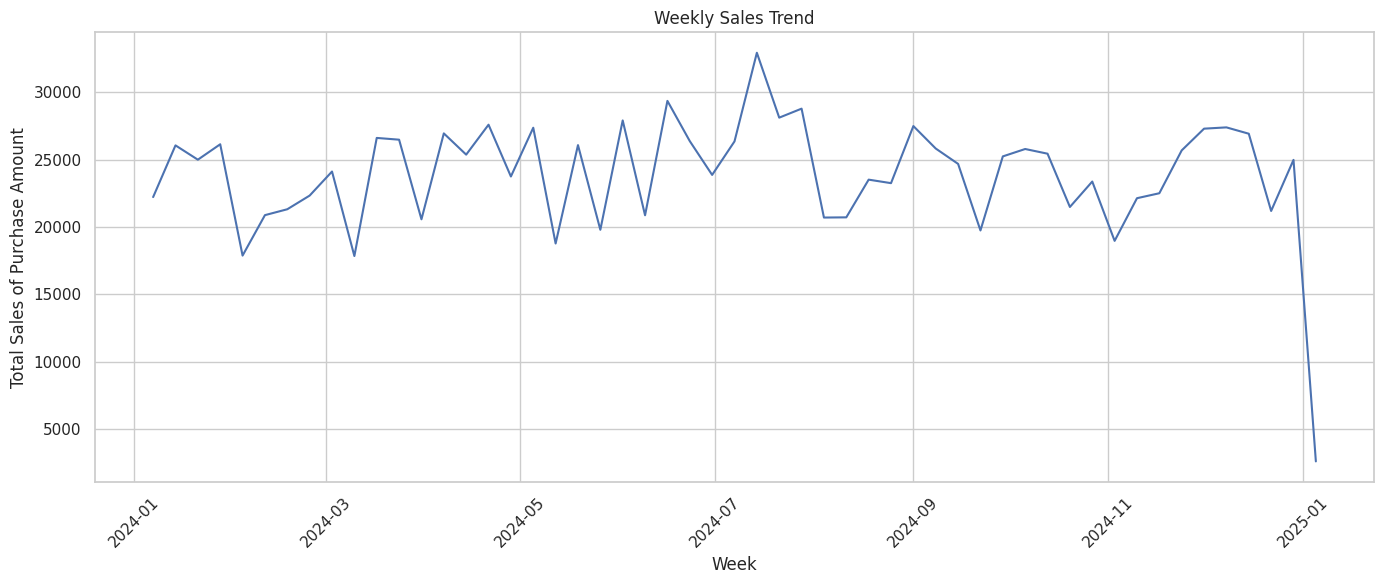

In [107]:
# Additional Weekly sale.
plt.figure(figsize=(14, 6))
weekly_sales = sales_df.resample('W', on='purchase_date')['purchase_amount'].sum()

# Plot weekly sales
plt.plot(weekly_sales.index, weekly_sales.values)
plt.title('Weekly Sales Trend')
plt.xlabel('Week')
plt.ylabel('Total Sales of Purchase Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

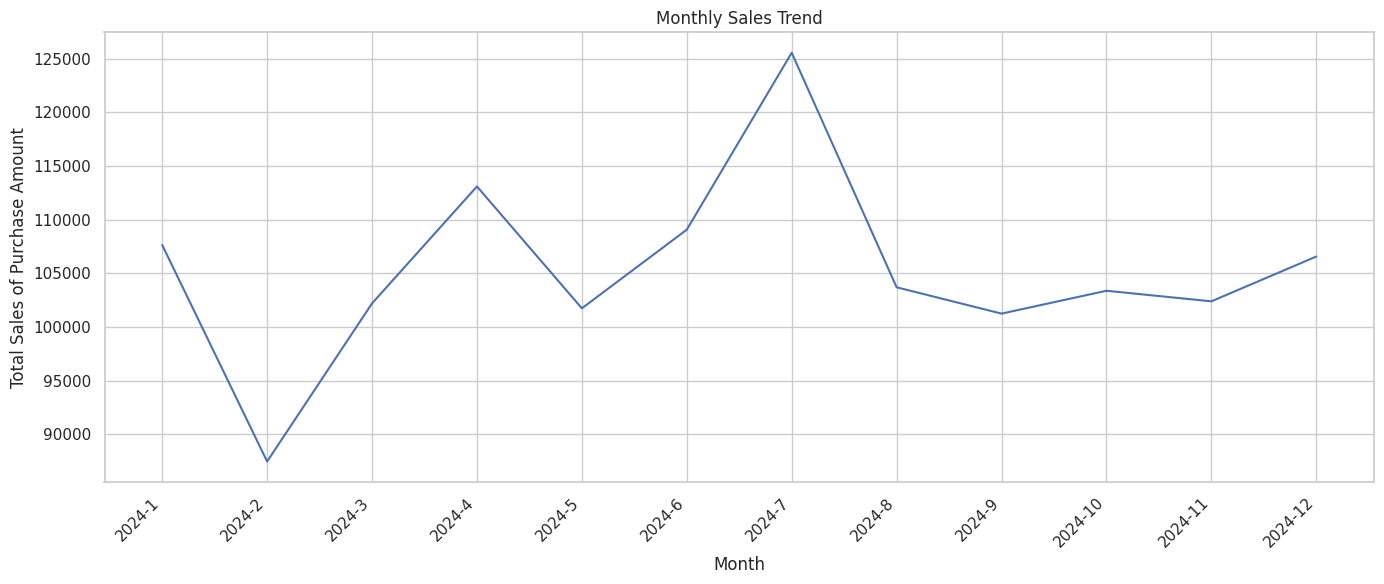

In [108]:
# Plot monthly sales.
plt.figure(figsize=(14, 6))

# Convert the MultiIndex to a list of strings for plotting
x_axis_labels = [f"{year}-{month}" for year, month in monthly_sales.index]

plt.plot(x_axis_labels, monthly_sales.values)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales of Purchase Amount')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

*Or Bar Plot.*

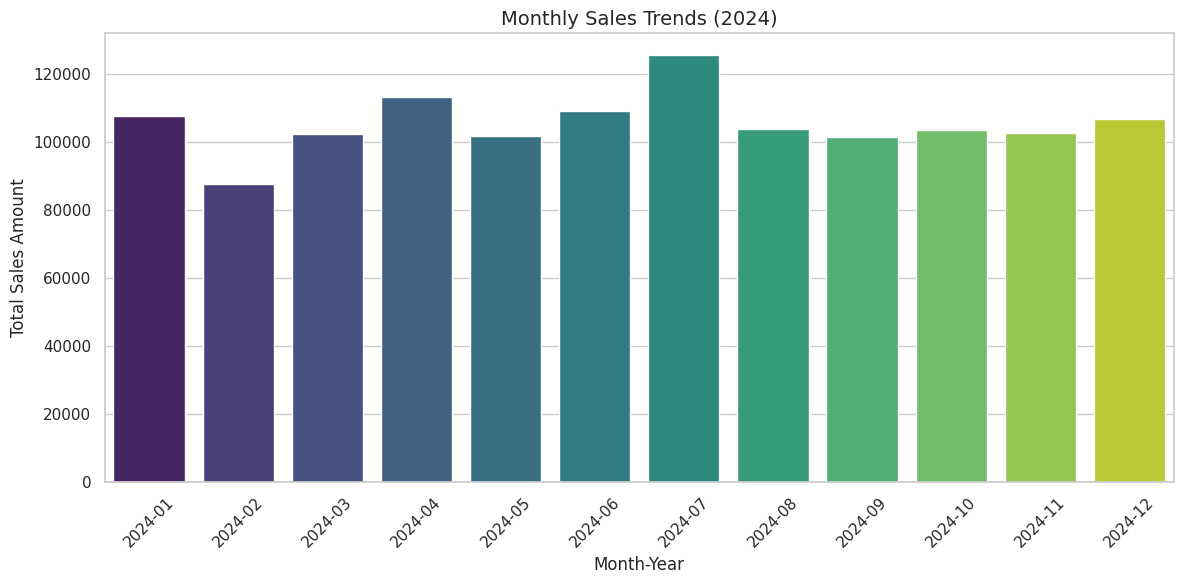

In [109]:
monthly_sales = monthly_sales.reset_index()

monthly_sales['Month-Year'] = monthly_sales['year'].astype(str) + '-' + monthly_sales['month'].astype(str).str.zfill(2)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x='Month-Year', y='purchase_amount', data=monthly_sales, palette="viridis")
plt.xticks(rotation=45)
plt.title("Monthly Sales Trends (2024)", fontsize=14)
plt.ylabel("Total Sales Amount")
plt.xlabel("Month-Year")
plt.tight_layout()
plt.show()


In [110]:
# Identified peak sales months

peak_months = monthly_sales.idxmax()
print(f"Peak sales months: {peak_months}")

Peak sales months: year                0
month              11
purchase_amount     6
Month-Year         11
dtype: int64


**Product Popularity (top product categories)**

In [111]:
product_popularity = sales_df['product_category'].value_counts()

product_popularity

,count
product_category,
Electronics,1044
Beauty,1015
Fashion,1012
Toys,994
Home,935


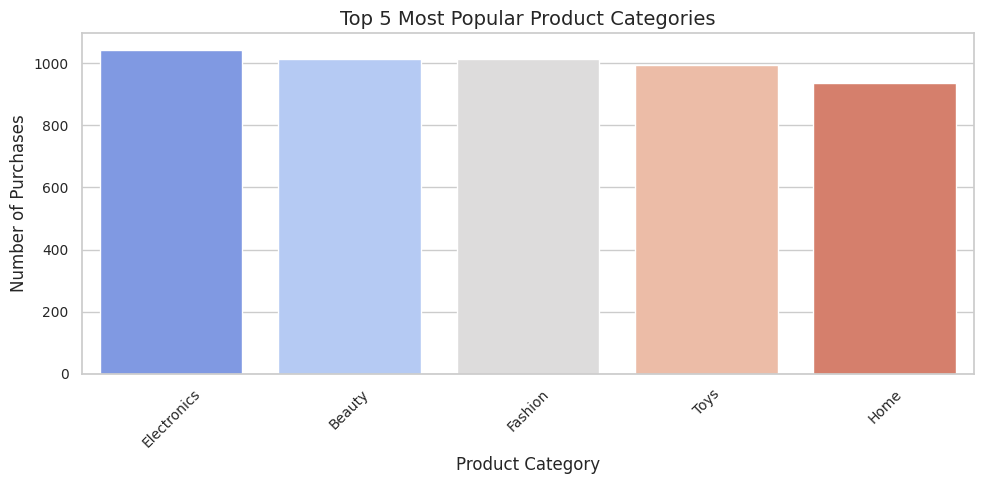

In [112]:
plt.figure(figsize=(10, 5))

sns.barplot(x=product_popularity.index[:5], y=product_popularity.values[:5], palette="coolwarm")

plt.title("Top 5 Most Popular Product Categories", fontsize=14)
plt.ylabel("Number of Purchases", fontsize=12)
plt.xlabel("Product Category", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [113]:
product_sales = sales_df.groupby('product_category')['purchase_amount'].sum()

product_sales

,purchase_amount
product_category,
Beauty,262828.95
Electronics,262039.82
Fashion,248594.20
Home,238371.36
Toys,252311.43


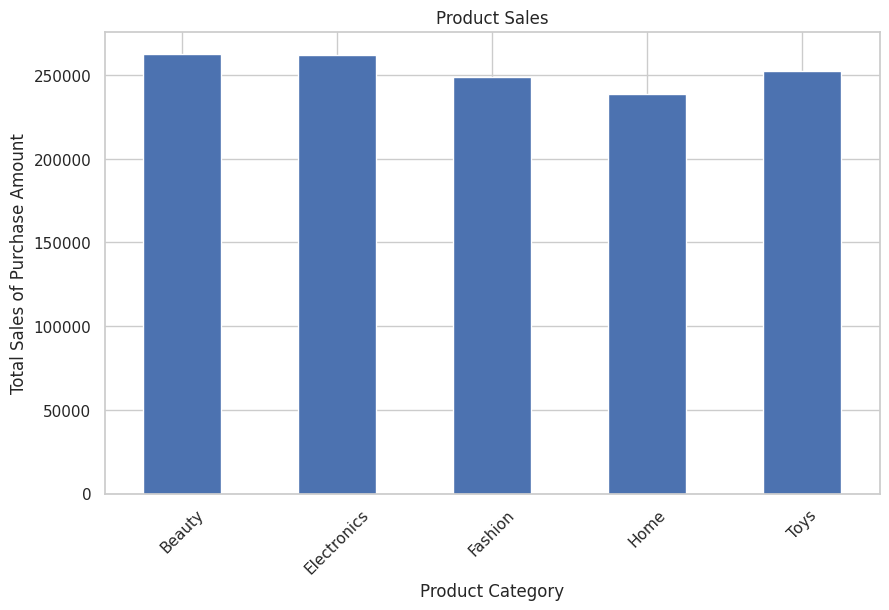

In [114]:
# Bar Plot.

plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar')
plt.title('Product Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales of Purchase Amount')
plt.xticks(rotation=45)
plt.show()

**High-Purchase amount Customer Segments (purchase amount by gender, age group, and location)**

In [115]:
# Create age groups

bins = [0, 18, 25, 35, 50, 65, 100]

labels = ['Under 18', '18-25', '26-35', '36-50', '51-65', '65+']

sales_df['age_group'] = pd.cut(sales_df['age'], bins=bins, labels=labels)

In [116]:
Purchase_Amt_by_segment = sales_df.groupby(['gender', 'age_group', 'location'])['purchase_amount'].sum()

Purchase_Amt_by_segment

gender  age_group  location
Female  Under 18   East         3164.35
                   North         993.35
                   South        2337.02
                   West         1277.13
        18-25      East        22439.17
                   North       21906.63
                   South       21561.83
                   West        18790.35
        26-35      East        30457.38
                   North       32135.56
                   South       31828.64
                   West        30864.84
        36-50      East        43778.43
                   North       43716.24
                   South       49264.08
                   West        43819.02
        51-65      East        41718.23
                   North       45683.49
                   South       45060.37
                   West        39952.93
        65+        East        15315.94
                   North       12436.84
                   South       13198.03
                   West        16017.50
Male    Under 18   East         2455.34
                   North        3390.90
                   South        2519.56
                   West         2195.45
        18-25      East        18832.28
                   North       22282.03
                   South       21888.11
                   West        21781.22
        26-35      East        31735.34
                   North       28217.67
                   South       32862.03
                   West        34824.67
        36-50      East        43321.02
                   North       41986.42
                   South       46300.13
                   West        43207.16
        51-65      East        48782.39
                   North       50504.78
                   South       45114.50
                   West        37120.50
        65+        East        11885.29
                   North       17458.78
                   South       13874.80
                   West        13888.04
Name: purchase_amount, dtype: float64

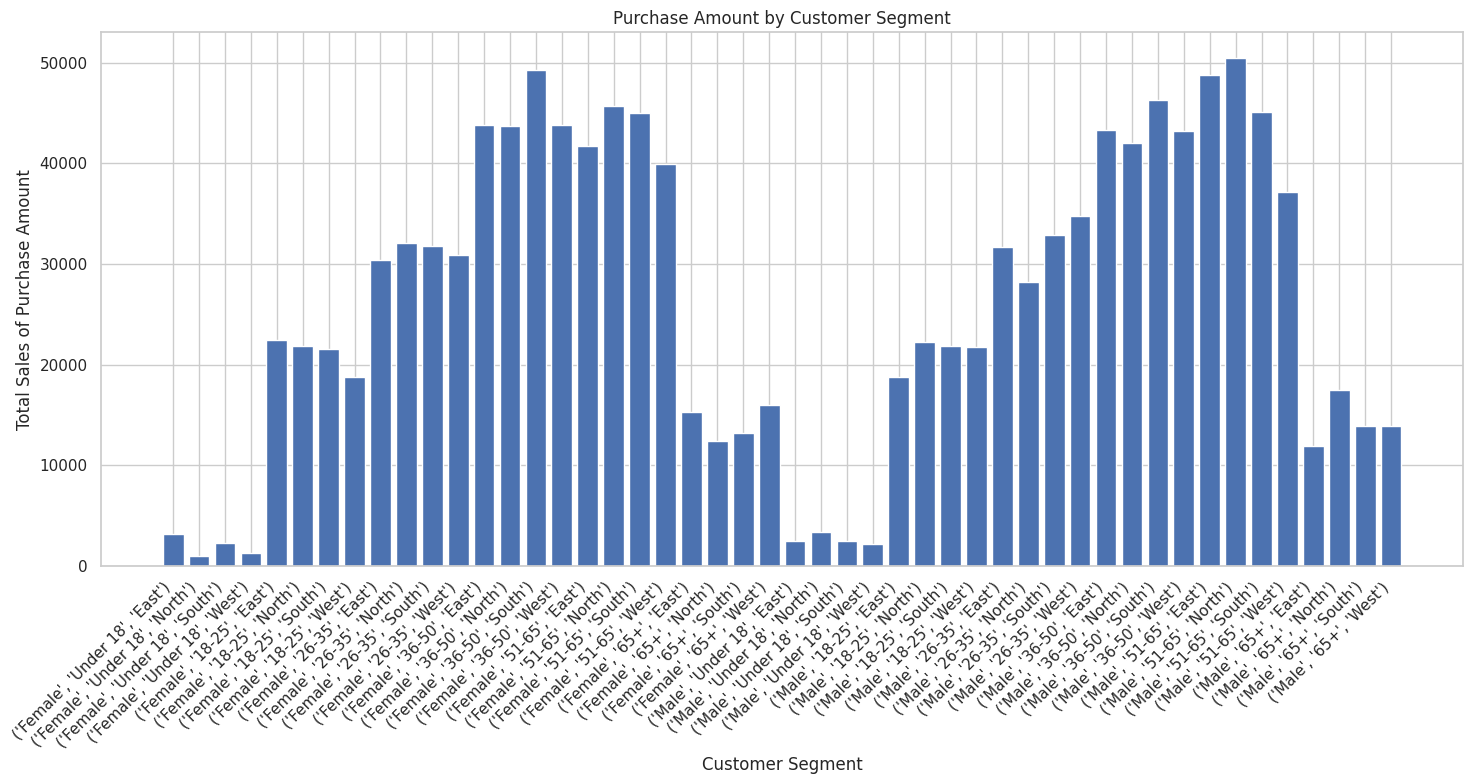

In [117]:
plt.figure(figsize=(15, 8))

# Convert the MultiIndex to a list of strings for plotting
x_axis_labels = [str(idx) for idx in Purchase_Amt_by_segment.index]  # Convert each tuple to a string

plt.bar(x_axis_labels, Purchase_Amt_by_segment.values)

plt.title('Purchase Amount by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales of Purchase Amount')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

*Or*

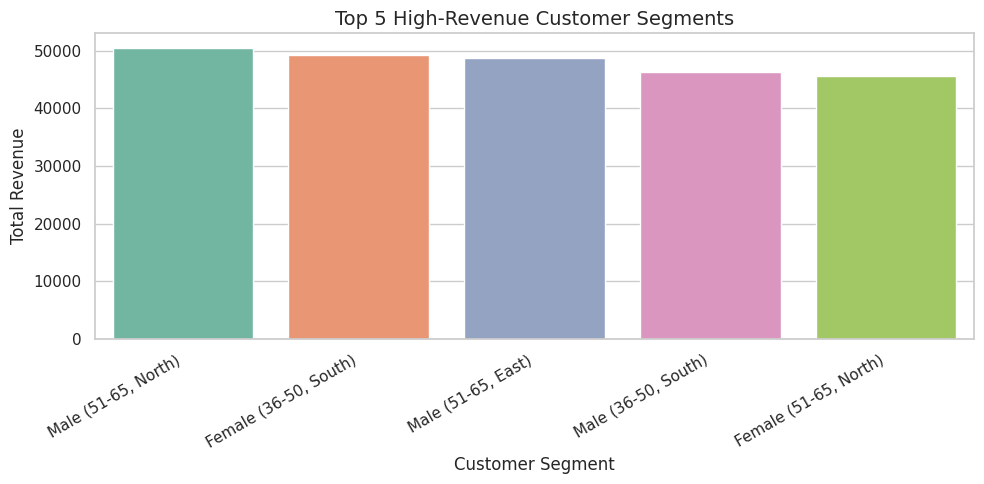

In [118]:
top_segments = Purchase_Amt_by_segment.sort_values(ascending=False).head(5).reset_index()

plt.figure(figsize=(10, 5))

sns.barplot(x=top_segments.apply(lambda x: f"{x['gender']} ({x['age_group']}, {x['location']})", axis=1),

            y=top_segments['purchase_amount'], palette="Set2")

plt.title("Top 5 High-Revenue Customer Segments", fontsize=14)
plt.ylabel("Total Revenue")
plt.xlabel("Customer Segment")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

**Demographics:**

In [119]:
# Demographic segmentation: Metrics by gender, age group, and location

demographic_metrics = sales_df.groupby(['gender', 'age_group', 'location']).agg(

    customer_count=('customer_id', 'nunique'),
    avg_purchase_amount=('purchase_amount', 'mean'),
    total_purchase_amount=('purchase_amount', 'sum'),
    avg_loyalty_points=('loyalty_points', 'mean'),
    avg_website_visits=('website_visits', 'mean')

).reset_index()

demographic_metrics

,gender,age_group,location,customer_count,avg_purchase_amount,total_purchase_amount,avg_loyalty_points,avg_website_visits
0,Female,Under 18,East,11,287.668182,3164.35,326.727273,33.545455
1,Female,Under 18,North,4,248.337500,993.35,622.500000,21.500000
2,Female,Under 18,South,9,259.668889,2337.02,355.222222,23.888889
3,Female,Under 18,West,7,182.447143,1277.13,431.142857,24.000000
4,Female,18-25,East,87,257.921494,22439.17,483.298851,26.126437
5,Female,18-25,North,88,248.938977,21906.63,521.375000,24.215909
6,Female,18-25,South,80,269.522875,21561.83,522.150000,25.087500
7,Female,18-25,West,70,268.433571,18790.35,459.600000,23.857143
8,Female,26-35,East,115,264.846783,30457.38,504.330435,26.452174
9,Female,26-35,North,116,277.030690,32135.56,453.241379,24.025862


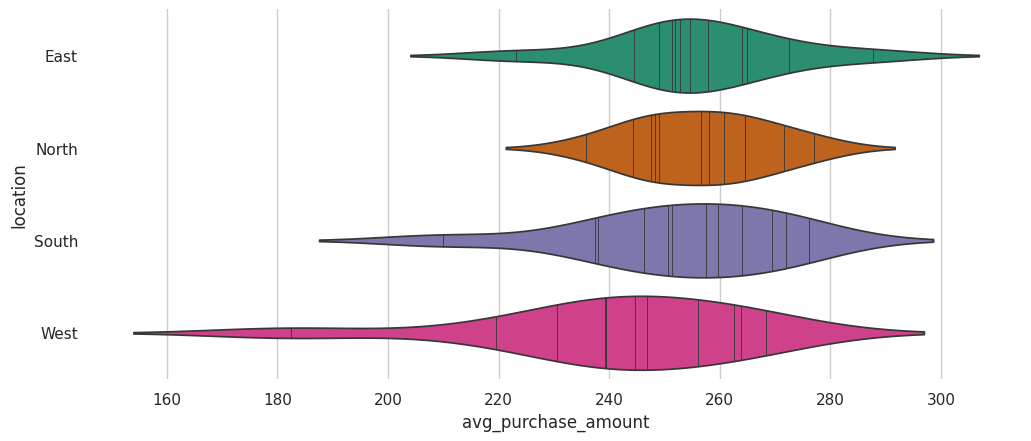

In [120]:
# location vs avg_purchase_amount

from matplotlib import pyplot as plt
import seaborn as sns

figsize = (12, 1.2 * len(demographic_metrics['location'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(demographic_metrics, x='avg_purchase_amount', y='location', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [121]:
# Purchase behavior segmentation: Preferred product categories and payment methods

behavior_metrics = sales_df.groupby(['gender', 'age_group']).agg(

    top_product_category=('product_category', lambda x: x.mode()[0]),
    top_payment_method=('preferred_payment_method', lambda x: x.mode()[0]),
    avg_purchase_frequency=('customer_id', 'count')

).reset_index()

behavior_metrics

,gender,age_group,top_product_category,top_payment_method,avg_purchase_frequency
0,Female,Under 18,Fashion,Debit Card,31
1,Female,18-25,Beauty,UPI,325
2,Female,26-35,Electronics,Credit Card,475
3,Female,36-50,Home,Net Banking,730
4,Female,51-65,Beauty,Cash,685
5,Female,65+,Beauty,Cash,216
6,Male,Under 18,Electronics,UPI,46
7,Male,18-25,Fashion,Credit Card,348
8,Male,26-35,Toys,Debit Card,491
9,Male,36-50,Electronics,Net Banking,715


In [122]:
# Correlation between loyalty points, website visits, and purchase behavior

correlation_metrics = sales_df[['purchase_amount', 'loyalty_points', 'website_visits']].corr()

correlation_metrics

,purchase_amount,loyalty_points,website_visits
purchase_amount,1.00000,0.011690,0.012590
loyalty_points,0.01169,1.000000,0.025753
website_visits,0.01259,0.025753,1.000000


**Visualizations:**

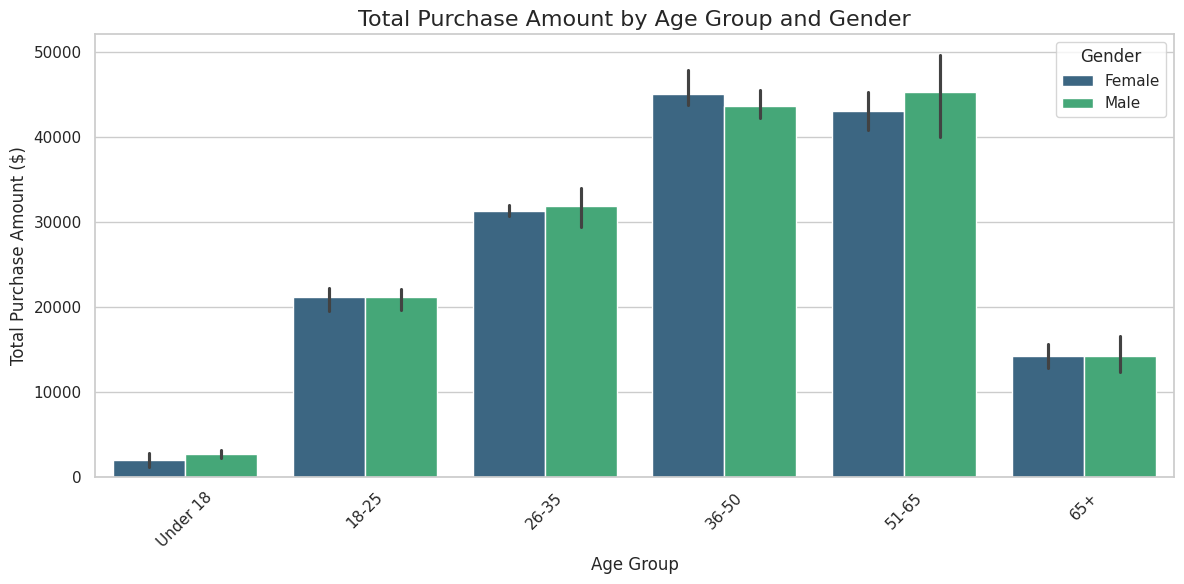

In [123]:
# Visualization: Total Purchase Amount by Age Group and Gender

plt.figure(figsize=(12, 6))

sns.barplot(
    data=demographic_metrics,
    x='age_group',
    y='total_purchase_amount',
    hue='gender',
    palette='viridis'
)

plt.title("Total Purchase Amount by Age Group and Gender", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Total Purchase Amount ($)", fontsize=12)
plt.legend(title="Gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


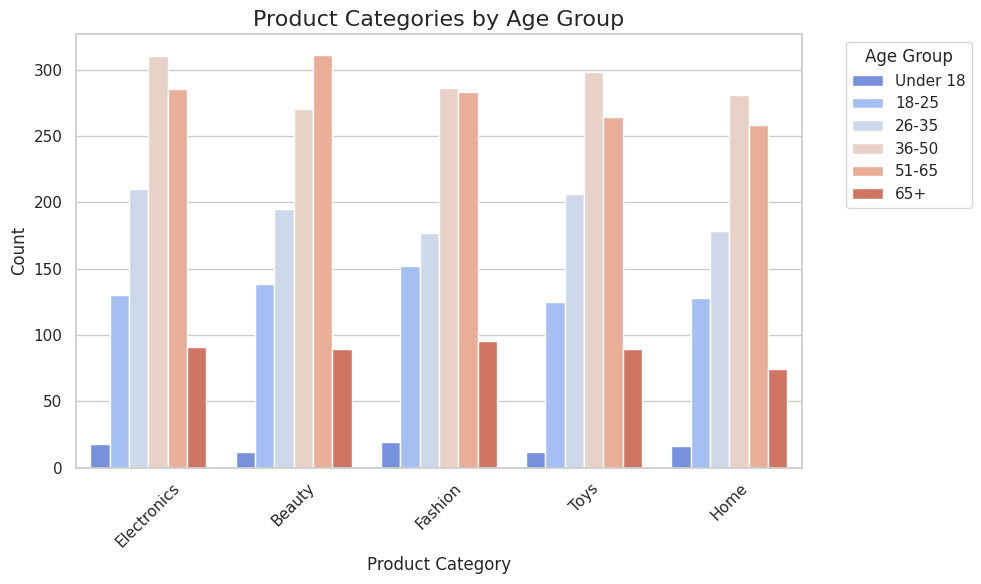

In [124]:
# Popular Product Categories by Age Group

plt.figure(figsize=(10, 6))

sns.countplot(
    data=sales_df,
    x='product_category',
    order=sales_df['product_category'].value_counts().index,
    hue='age_group',
    palette='coolwarm'
)
plt.title("Product Categories by Age Group", fontsize=16)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

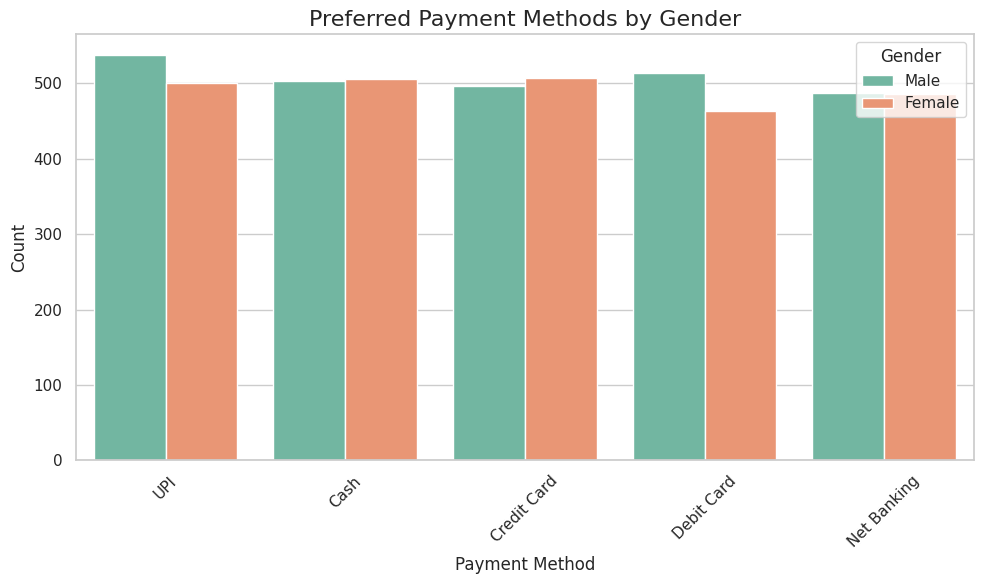

In [125]:
# Preferred Payment Methods by Gender

plt.figure(figsize=(10, 6))

sns.countplot(
    data=sales_df,  # Pass the DataFrame to the data parameter
    x='preferred_payment_method',
    order=sales_df['preferred_payment_method'].value_counts().index,
    hue='gender',
    palette='Set2'
)
plt.title("Preferred Payment Methods by Gender", fontsize=16)
plt.xlabel("Payment Method", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

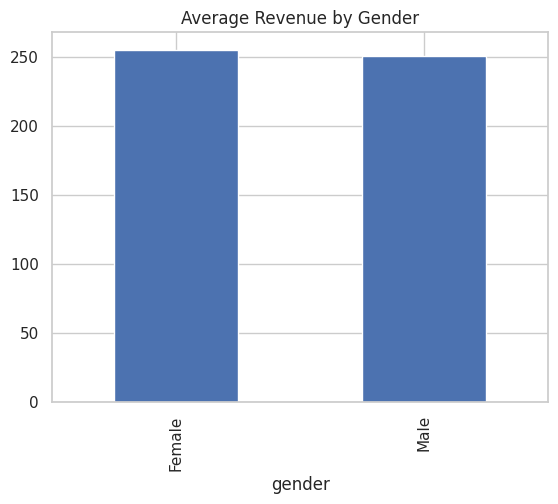

In [126]:
# Bar chart of revenue by gender segments
gender_segments.plot(kind='bar', title='Average Revenue by Gender')
plt.show()

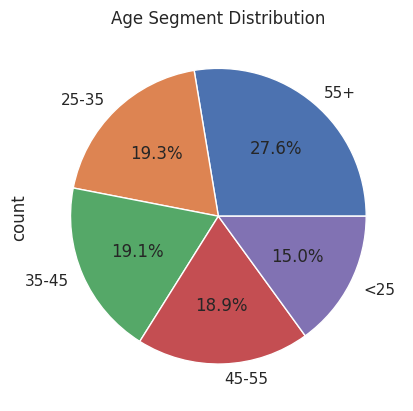

In [127]:
# Pie chart of age segment distribution
age_segment_counts.plot(kind='pie', autopct='%1.1f%%', title='Age Segment Distribution')
plt.show()